# Airline analytics

#### Project Description

Hundreds of flights are made every day. It is important to understand the preferences of users who buy tickets to certain destinations.
It is necessary to study the database and analyze the demand of passengers for flights to the cities where the largest festivals are held.

#### Описание данных

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
1. model — модели самолета
2. flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
1. city — городах
2. average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года


## План работы

* [Этап 1. Открытие файлов и их прочтение.](#1-bullet)
* [Этап 2. Проверка данных.](#2-bullet)
* [Этап 3. Построение графиков.](#3-bullet)
* [Этап 4. Вывод.](#4-bullet)

## Этап 1.

### Импорт библиотек.

In [1]:
pip install seaborn==0.11.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Чтение файлов.

In [3]:
query_1 = pd.read_csv('/datasets/query_1.csv')

In [4]:
query_3 = pd.read_csv('/datasets/query_3.csv')

In [5]:
display(query_1.head())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [6]:
display(query_3.head())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


##  Этап 2.

### Проверка данных

In [7]:
list_of_query = [query_1, query_3]

In [8]:
for i in list_of_query:
    i.info()
    print()
    print('---------------------------')
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes

---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB

---------------------------



Пропущенных значений нет, данные находятся в правильном формате. Исправлять нечего.

In [9]:
pip install data_view

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for data-view: filename=data_view-0.2.0-py3-none-any.whl size=5367 sha256=351f09716da738032c736c6269cb9b841428b092e00877857ef63adf0ac5f589
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/ac/9f/728bf8fd260c161c8e1e848ecd1388eaa81b8c5afe4a3849da
Successfully built data-view
Note: you may need to restart the kernel to use updated packages.


In [10]:
from data_view import *


In [11]:
view(query_1, only_numeric=True, histograms=False)

Размер данных: (8, 2)

Обзор первых/последних строк данных
----------------------------------------------------------------------------------------------------


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185



Типы данных и кол-во непустых строк
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


""



Наличие дат (месяц, год, день) или id в названиях столбцов
----------------------------------------------------------------------------------------------------
Столбцов с упоминанием даты или id нет!

Кол-во пропусков в данных
----------------------------------------------------------------------------------------------------


,Пропуски,"Пропуски, %"
Имя,,
model,0,0
flights_amount,0,0



Кол-во дубликатов в данных
----------------------------------------------------------------------------------------------------
0

Описательные статистики числовых признаков
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,number_of_outliers
flights_amount,8,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0,0




Матрица корреляций
----------------------------------------------------------------------------------------------------


,flights_amount
flights_amount,1


## Этап 3.

#### Выберем топ-10 городов по количеству рейсов

In [12]:
top_10 = query_3.pivot_table(index='city', values='average_flights').nlargest(10, 'average_flights')


In [13]:
top_10

,average_flights
city,
Москва,129.774194
Санкт-Петербург,31.161290
Новосибирск,17.322581
Красноярск,11.580645
Екатеринбург,11.322581
Ростов-на-Дону,10.193548
Пермь,10.129032
Брянск,10.000000
Сочи,9.612903


Из данной сводной таблицы мы видим, что наиболее загруженные рейсами города, что очевидно, это Москва и Санкт-Петербург. Удивительно в этом списке видеть Ульяновск и Брянск.

#### Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

Text(0.5, 1.0, 'Кол-во рейсов для каждой модели самолета')

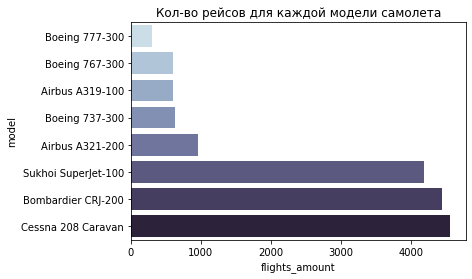

In [14]:
sns.barplot(data=query_1.sort_values(by='flights_amount', ascending=True), y="model", x="flights_amount", palette = "ch:s=.25,rot=-.25")
plt.title('Кол-во рейсов для каждой модели самолета')

Из данной таблицы можно понять, что самыми часто используемыми моделями являются Cessna 208, Bombardier CRJ-200 и Sukhoi Superjet-100, что звучит логично, если мы говорим о внутренних рейсах, а не международных

Text(0.5, 1.0, 'города и количество рейсов')

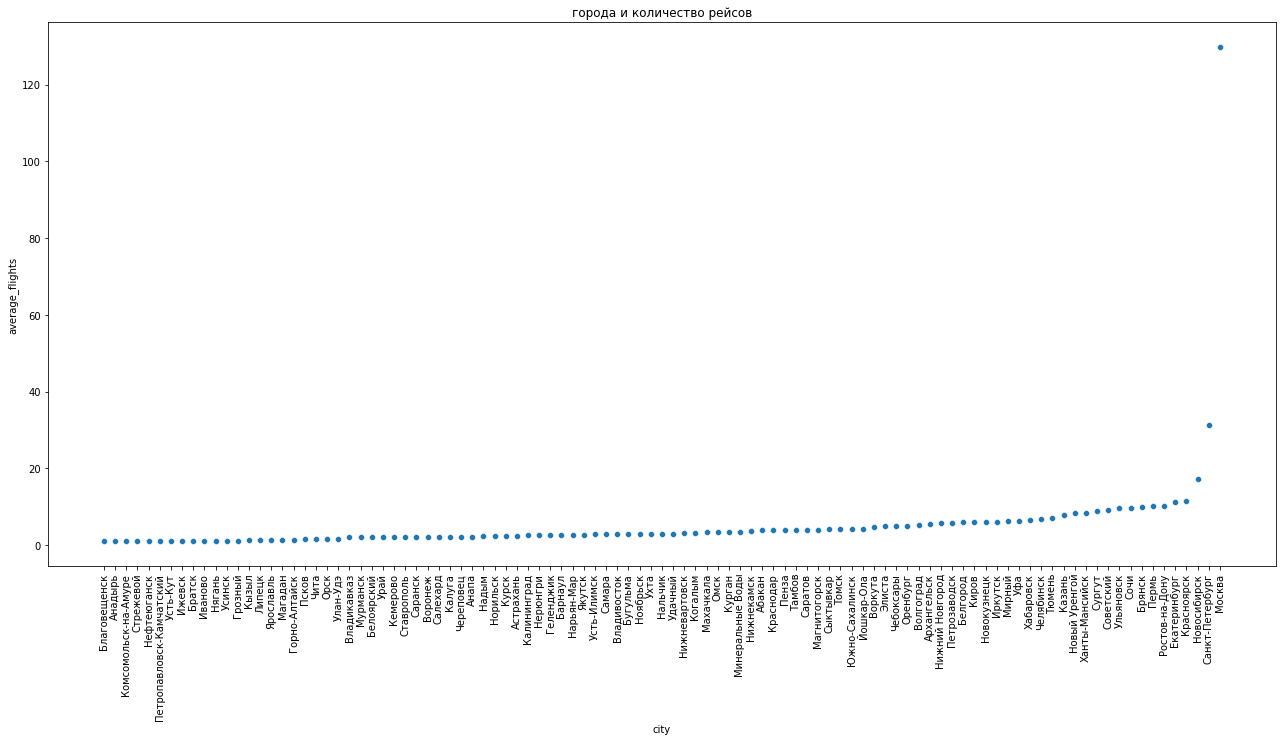

In [15]:
plt.figure(figsize=(22,10))
sns.scatterplot(data = query_3.sort_values(by=['average_flights'], ascending=True) ,x = 'city' , y = 'average_flights')
plt.xticks(rotation=90)
plt.title('города и количество рейсов')

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Так уже гораздо понятнее👌</div> 

Москва далеко вперели всех, как уже было сказано ранее, Санкт-Петербург на втором месте, за ним Новокузнецк идет. Все остальные более менее близки друг к другу.

Text(0.5, 1, 'топ-10 городов и количество рейсов')

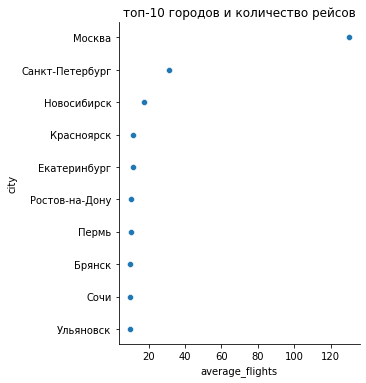

In [16]:
sns.relplot(data = top_10 ,y = 'city' , x = 'average_flights')
plt.title('топ-10 городов и количество рейсов')

Москва даже на фоне 10 самых популярных напрвлений выделяется значительно, отрыв от второго места колоссальный.

## Этап 4.


### Conclusion

1. On the basis of the above graphs on domestic routes dominate not internationally known and used in the same international flights of the aircraft, and most other models of the Cessna 208, Bombardier CRJ-200 and Sukhoi Superjet-100.
2. The most popular destinations for domestic flights are Moscow by a wide margin, then Petersburg, Novosibirsk, everything else the same city for a number of flights is far from the top positions and equal to each other, so much of sense to share them.